In [1]:
import keras

In [2]:
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [4]:
fiv = X_test[167]

In [5]:
fiv.shape

(28, 28)

In [6]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [7]:
print('Train Images',X_train.shape)
print('Train Labels',y_train.shape)
print('Test Images',X_test.shape)
print('Test Labels',y_test.shape)

Train Images (60000, 28, 28)
Train Labels (60000,)
Test Images (10000, 28, 28)
Test Labels (10000,)


In [8]:
X_train = X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [9]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [10]:
model = Sequential()
model.add(Dense(units=128,activation='relu',input_shape=(784,)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [13]:
def lr_schedule(epoch):
    lr = 0.1
    if epoch > 15:
        lr = lr / 100
    elif epoch > 10:
        lr = lr / 10
    elif epoch > 5:
        lr = lr / 5
    print('Learning rate: ',lr)
    return lr

In [14]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [15]:
save_dir = os.path.join(os.getcwd(),'mnistdatasavemodel')

In [16]:
model_name = 'mnistmodel.{epoch:03d}.h5'

In [17]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

In [18]:
modelpath = os.path.join(save_dir,model_name)

In [22]:
checkpoint = ModelCheckpoint(filepath = modelpath,
                             monitor ='val_acc',
                             verbose = 1,
                             period = 1)

In [23]:
model.compile(optimizer= SGD(lr_schedule(0)),loss='categorical_crossentropy',metrics=['accuracy'])

Learning rate:  0.1


In [24]:
model.fit(X_train,y_train,batch_size=32,epochs=20,shuffle=True,verbose=1,callbacks=[checkpoint,lr_scheduler])

Learning rate:  0.1
Epoch 1/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.2822 - accuracy: 0.9143
Epoch 00001: saving model to /home/mayowa/Major_Rain/personal-work/mnistdatasavemodel/mnistmodel.001.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2818 - accuracy: 0.9144
Learning rate:  0.1
Epoch 2/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.1144 - accuracy: 0.9649
Epoch 00002: saving model to /home/mayowa/Major_Rain/personal-work/mnistdatasavemodel/mnistmodel.002.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1143 - accuracy: 0.9649
Learning rate:  0.1
Epoch 3/20
1871/1875 [============================>.] - ETA: 0s - loss: 0.0816 - accuracy: 0.9750
Epoch 00003: saving model to /home/mayowa/Major_Rain/personal-work/mnistdatasavemodel/mnistmodel.003.h5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0815 - accuracy: 0.9750
Learning rate:  0.1
Epoch 4/20
1867/1875 [===================

In [25]:
accuracy = model.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy :",accuracy[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9827
Accuracy : 0.982699990272522


In [13]:
X_test = X_test.astype('float32')/255

In [17]:
img = X_test[167]

In [18]:
img.shape

(784,)

In [19]:
img.reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
img.shape

(784,)

In [21]:
image_test = img.reshape((1,784))

In [22]:
img_class = model.predict_classes(image_test)
classname = img_class[0]
print("class: ",classname)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
class:  5


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

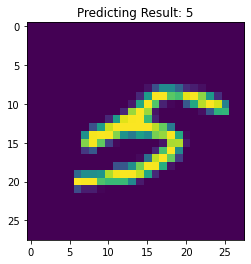

In [24]:
plt.title("Predicting Result: %s" %(classname))
plt.imshow(fiv)
plt.show()